In [1]:
import pandas as pd

df = pd.read_csv("./data/Temperature/GlobalLandTemperaturesByMajorCity.csv.bz2")

df.dropna(inplace = True)
df["dt"] = pd.to_datetime(df["dt"])
df["year"] = df["dt"].dt.year

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849


In [2]:
res = df.groupby(by=["year"]).agg(avgTemp=("AverageTemperature", "mean"), minTemp=("AverageTemperature", "min"), maxTemp=("AverageTemperature", "max"))
res

,avgTemp,minTemp,maxTemp
year,,,
1743,4.020077,-2.570,10.365
1744,10.344192,-9.774,22.221
1745,0.384885,-11.656,10.932
1750,9.145748,-12.954,24.309
1751,9.441240,-12.599,23.542
...,...,...,...
2009,19.833752,-17.856,36.607
2010,19.911734,-18.555,37.899
2011,19.549197,-22.029,37.184


In [3]:
res.loc[1987]

avgTemp    19.408556
minTemp   -19.802000
maxTemp    37.033000
Name: 1987, dtype: float64

In [4]:
res.loc[1980:2014, "avgTemp"]

year
1980    19.068541
1981    19.115568
1982    19.068149
1983    19.197572
1984    18.960732
1985    18.997136
1986    19.044756
1987    19.408556
1988    19.352042
1989    19.227381
1990    19.509549
1991    19.271515
1992    19.091054
1993    19.178233
1994    19.472903
1995    19.439888
1996    19.171847
1997    19.350162
1998    19.946031
1999    19.698959
2000    19.506243
2001    19.679352
2002    19.855685
2003    19.630197
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.263006
Name: avgTemp, dtype: float64

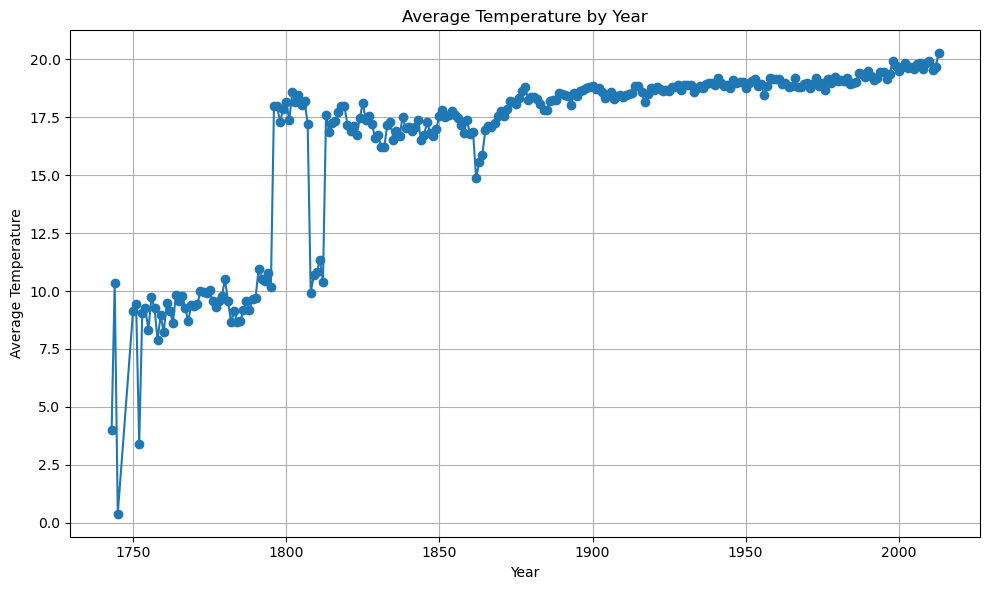

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

data = df.groupby(by=["year"]).agg(avgTemp=("AverageTemperature", "mean")).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data["year"], data["avgTemp"], marker='o', linestyle='-')
plt.title("Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

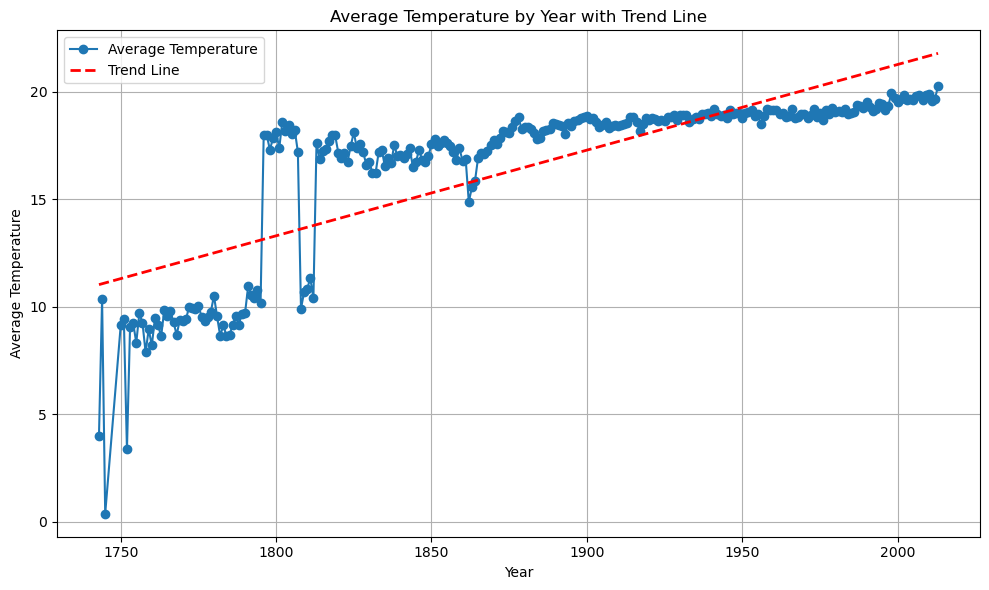

In [6]:
import numpy as np

x = data["year"]
y = data["avgTemp"]

# Fit a linear trend line (degree=1 for linear)
coeffs = np.polyfit(x, y, deg=1)
trend_line = np.poly1d(coeffs)

# Generate y values for the trend line
y_trend = trend_line(x)

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label="Average Temperature")

# Plot trend line
plt.plot(x, y_trend, color='red', linestyle='--', linewidth=2, label="Trend Line")

plt.title("Average Temperature by Year with Trend Line")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
res.iloc[0]

avgTemp     4.020077
minTemp    -2.570000
maxTemp    10.365000
Name: 1743, dtype: float64

In [8]:
res.iloc[-1]

avgTemp    20.263006
minTemp   -21.106000
maxTemp    37.126000
Name: 2013, dtype: float64

In [9]:
res.sort_values(by=["avgTemp"], inplace=True)
res

,avgTemp,minTemp,maxTemp
year,,,
1745,0.384885,-11.656,10.932
1752,3.374756,-16.217,14.065
1743,4.020077,-2.570,10.365
1758,7.892749,-15.429,25.041
1760,8.209619,-15.846,25.582
...,...,...,...
2007,19.854270,-12.937,36.429
2002,19.855685,-16.138,37.200
2010,19.911734,-18.555,37.899
